     val  act
no           
16  0.99    1
1   0.97    1
15  0.88    1
2   0.86    1
3   0.75    1
12  0.75    1
4   0.71    1
5   0.66    0
9   0.56    0
6   0.55    0
11  0.46    0
10  0.45    0
7   0.43    0
8   0.33    0
13  0.24    0
14  0.16    0
     val  act       TAR       FAR
no                               
16  0.99    1  0.142857  0.000000
1   0.97    1  0.285714  0.000000
15  0.88    1  0.428571  0.000000
2   0.86    1  0.571429  0.000000
3   0.75    1  0.714286  0.000000
12  0.75    1  0.857143  0.000000
4   0.71    1  1.000000  0.000000
5   0.66    0  1.000000  0.111111
9   0.56    0  1.000000  0.222222
6   0.55    0  1.000000  0.333333
11  0.46    0  1.000000  0.444444
10  0.45    0  1.000000  0.555556
7   0.43    0  1.000000  0.666667
8   0.33    0  1.000000  0.777778
13  0.24    0  1.000000  0.888889
14  0.16    0  1.000000  1.000000


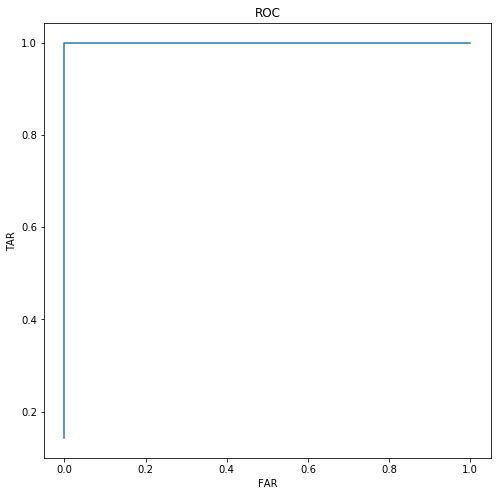

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
score = [0.97, 0.86, 0.75, 0.71, 0.66, 0.55, 0.43, 0.33, 0.56, 0.45, 0.46, 0.75, 0.24, 0.16, 0.88, 0.99]
act = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]

c_table = pd.DataFrame({'no' : num, 'val' : score, 'act' : act})
c_table = c_table.set_index('no')
c_table.sort_values(by='val', ascending=False, inplace=True)

print(c_table)

t = f = 0
tar = []
far = []
one_count = c_table['act'].value_counts()[1]
zero_count = c_table['act'].value_counts()[0]
for i in c_table.index :
    if c_table['act'][i] == 1 :
        t += 1
    else :
        f += 1
    tar.append(t / one_count) 
    far.append(f / zero_count)

c_table['TAR'] = tar
c_table['FAR'] = far

print(c_table)

plt.figure(figsize=(8,8))
plt.title("ROC")
plt.xlabel("FAR")
plt.ylabel("TAR")
plt.plot(c_table['FAR'], c_table['TAR'])
plt.show()

In [2]:
w1s = [0.5, 0.5, 0.3, 1.0, 0.8]
w2s = [0.5, 0.5, 0.3, 1.0, 0.8]
thetas = [0.7, 0.8, 0.5, 1.0, 1.0]
bs = [-0.7, -0.7, -0.5, -1.5, -1.0]
for i in range(len(w1s)) :
    def AND(x1, x2):
        w1, w2, theta = w1s[i], w2s[i], thetas[i]
        tmp = x1 * w1 + x2 * w2
        if(tmp > theta) :
            return 1
        else :
            return 0

    print(AND(0, 0))
    print(AND(0, 1))
    print(AND(1, 0))
    print(AND(1, 1))
    print()



0
0
0
1

0
0
0
1

0
0
0
1

0
0
0
1

0
0
0
1



In [3]:
import numpy as np
for i in range(len(w1s)) :
    def AND(x1, x2):
        x = np.array([x1, x2])
        w = np.array([w1s[i], w2s[i]])
        b = bs[i]
        tmp = np.sum(x*w) + b
        if tmp <= 0:
            return 0
        else : 
            return 1

    print(AND(0, 0))
    print(AND(0, 1))
    print(AND(1, 0))
    print(AND(1, 1))
    print()

0
0
0
1

0
0
0
1

0
0
0
1

0
0
0
1

0
0
0
1



In [4]:
def AND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else : 
        return 1


In [5]:
def NAND(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else : 
        return 1

In [6]:
def OR(x1, x2) :
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp <= 0:
        return 0
    else : 
        return 1

In [7]:
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2)) # 다중 퍼셉트론

In [8]:
def step_function(x) :
    y = x > 0
    return y.astype(np.int)

In [9]:
step_function(np.array([3,2,1,0,-1,-2]))

array([1, 1, 1, 0, 0, 0])

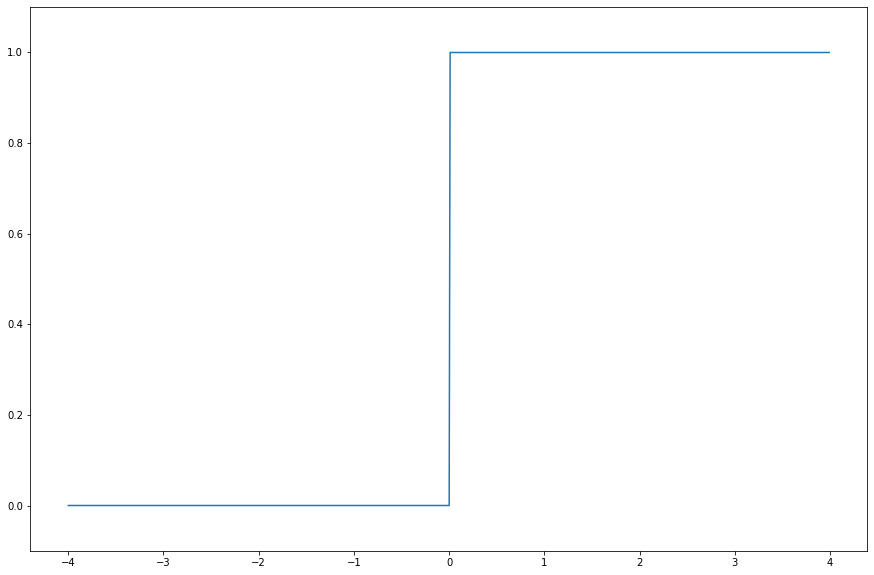

In [10]:
x1 =  np.arange(-4.0, 4.0, 0.01)
y1 = step_function(x1)
plt.figure(figsize=(15, 10))
plt.plot(x1, y1)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

sigmoid(1)

0.7310585786300049

In [12]:
x2 = np.arange(-4.0, 4.0, 0.01)
y2 = sigmoid(x2)

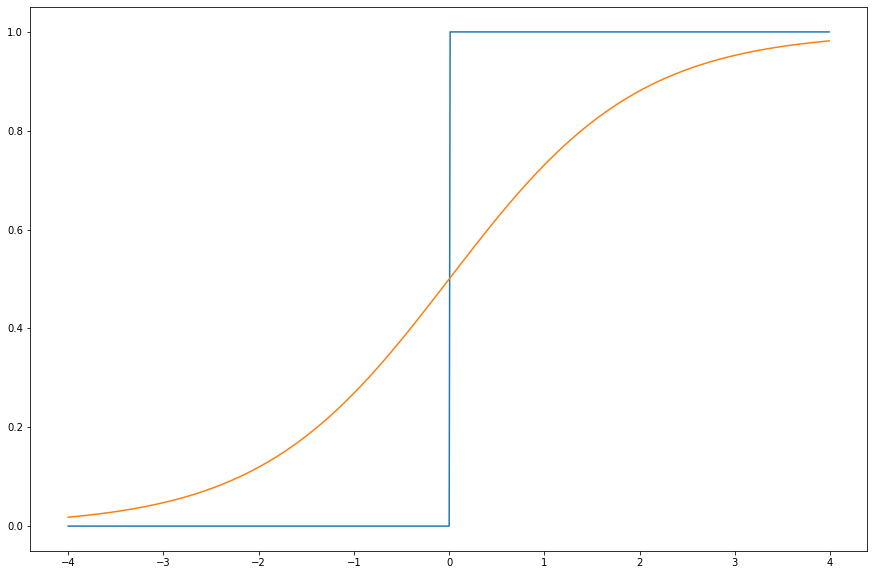

In [13]:
plt.figure(figsize=(15,10))
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

In [14]:
def relu(x):
    return np.maximum(0, x)

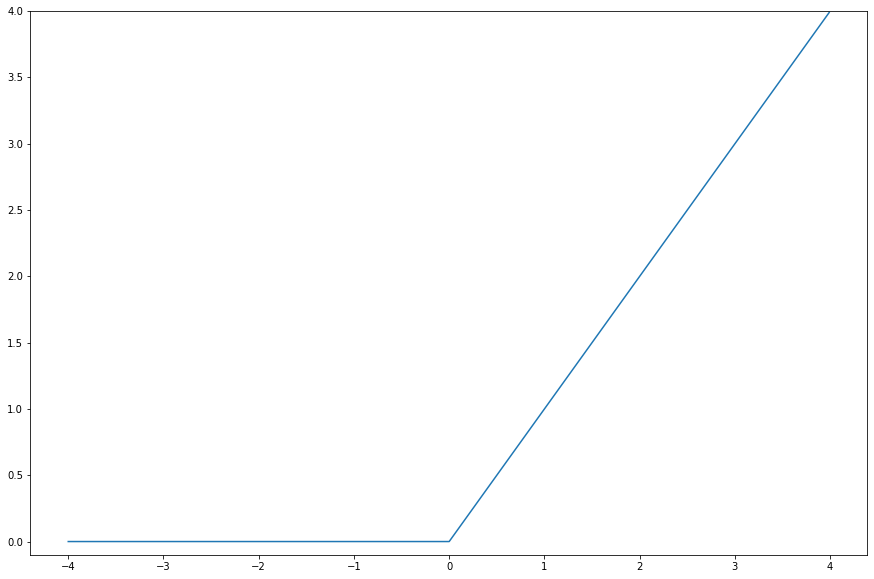

In [15]:
x3 = np.arange(-4, 4, 0.01)
y3 = relu(x3)
plt.figure(figsize=(15,10))
plt.plot(x3, y3)
plt.ylim(-0.1, 4)
plt.show()

In [16]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print("A.shape = ", A.shape)
print("B.shape = ", B.shape)

A.shape =  (2, 2)
B.shape =  (2, 2)


In [17]:
result = np.dot(A, B)
print("A·B =", result)
print("result.shape =", result.shape)

A·B = [[19 22]
 [43 50]]
result.shape = (2, 2)


In [18]:
x = np.array([1, 2])
print("shape of input = ", x.shape)
weight = np.array([[1, 3, 5], [2,4,6]])
print("weight = ", weight)
print("shape of weight = ", weight.shape)
y = np.dot(x, weight)
print("y = ", y)

shape of input =  (2,)
weight =  [[1 3 5]
 [2 4 6]]
shape of weight =  (2, 3)
y =  [ 5 11 17]


In [36]:
x = np.array([1.0, 0.5])
weight1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
bias1 = np.array([0.1, 0.2, 0.3])
print("shape of input = ", x.shape)
print("shape of weight1 = ", weight1.shape)
print("shape of bias1 = ", bias1.shape)

result_of_inner1 = np.dot(x, weight1) + bias1
result_of_sigmoid1 = sigmoid(result_of_inner1)
print("result of inner1 = ", result_of_inner1)
print("result of sigmoid1 = ", result_of_sigmoid1) ## 한 층을 쌓는 것

shape of input =  (2,)
shape of weight1 =  (2, 3)
shape of bias1 =  (3,)
result of inner1 =  [0.3 0.7 1.1]
result of sigmoid1 =  [0.57444252 0.66818777 0.75026011]


In [26]:
weight2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
bias2 = np.array([0.1, 0.2])
print("shape of sigmoid1 = ", result_of_sigmoid1.shape)
print("shape of weight2 = ", weight2.shape)
print("shape of bias2 = ", bias2.shape)

shape of sigmoid1 =  (3,)
shape of weight2 =  (3, 2)
shape of bias2 =  (2,)


In [27]:
result_of_inner2 = np.dot(result_of_sigmoid1, weight2) + bias2
result_of_sigmoid2 = sigmoid(result_of_inner2)
print("result of inner2 =", result_of_inner2)
print("result of sigmoid2 =", result_of_sigmoid2)

result of inner2 = [0.51615984 1.21402696]
result of sigmoid2 = [0.62624937 0.7710107 ]


In [28]:
def identitiy_function(x):
    return x

In [31]:
weight3 = np.array([[0.1, 0.3], [0.2, 0.4]])
bias3 = np.array([0.1, 0.2])
print("shape of sigmoid2 = ", result_of_sigmoid2.shape)
print("shape of sigmoid3 = ", weight3.shape)
print("shape of bias3 = ", bias3.shape)

result_of_inner3 = np.dot(result_of_sigmoid2, weight3) + bias3
output = identitiy_function(result_of_inner3)
print("result of inner3", result_of_inner3)
print("output = ", output)

shape of sigmoid2 =  (2,)
shape of sigmoid3 =  (2, 2)
shape of bias3 =  (2,)
result of inner3 [0.31682708 0.69627909]
output =  [0.31682708 0.69627909]


In [37]:
def init_network():
    network = {}
    network['weight1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['bias1'] = np.array([0.1, 0.2, 0.3])
    network['weight2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['bias2'] = np.array([0.1, 0.2])
    network['weight3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['bias3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    weight1, weight2, weight3 = network['weight1'], network['weight2'], network['weight3']
    bias1, bias2, bias3 = network['bias1'], network['bias2'], network['bias3']
    
    a1 = np.dot(x, weight1) + bias1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, weight2) + bias2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, weight3) + bias3
    y = identitiy_function(a3)
    
    return y

network = init_network()
y = forward(network, [1.0, 0.5])
print(y)

[0.31682708 0.69627909]


In [64]:
def softmax(matrix) : # 이 함수는 실행시 오버플로우가 발생할 가능성이 있다.
    exponential_matrix = np.exp(matrix)
    print(exponential_matrix)
    sum_of_exponential_matrix = np.sum(exponential_matrix)
    y = exponential_matrix / sum_of_exponential_matrix
    return y

mym = np.array([[1, 2], [3, 4]])
softmax(mym)

[[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]


array([[0.0320586 , 0.08714432],
       [0.23688282, 0.64391426]])

In [62]:
def softmax_m(matrix) :
    maximum_of_matrix = np.max(matrix)
    print(maximum_of_matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    print(difference_from_maximum)
    exponential_of_difference = np.exp(difference_from_maximum)
    print(exponential_of_difference)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y

In [63]:
softmax_m(mym)

4
[[-3 -2]
 [-1  0]]
[[0.04978707 0.13533528]
 [0.36787944 1.        ]]


array([[0.0320586 , 0.08714432],
       [0.23688282, 0.64391426]])

In [67]:
matrix = np.array([0.3, 2.9, 4.0])
y = softmax_m(matrix)
print("y = ", y)
print("sum of y = " , np.sum(y))

4.0
[-3.7 -1.1  0. ]
[0.02472353 0.33287108 1.        ]
y =  [0.01821127 0.24519181 0.73659691]
sum of y =  1.0
